In [ ]:
# Basic imports
import sys
from Allohubpy import SAtraj
from Allohubpy import Overlap
from Allohubpy import SANetwork
from Allohubpy.plotter import Allohub_plots
from Allohubpy import SAPLM
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
# Utility functions to store results
def save_array_to_txt(array, filename, delimiter=',', fmt='%.18e'):
    """
    Saves a NumPy array to a text file.

    Parameters:
        array (numpy.ndarray): The NumPy array to save.
        filename (str): The path to the output text file.
        delimiter (str): The string used to separate values (default is ',').
        fmt (str): Format for each element in the array (default is '%.18e' for scientific notation).
    """
    try:
        np.savetxt(filename, array, delimiter=delimiter, fmt=fmt)
        print(f"Array saved successfully to {filename}")
    except Exception as e:
        print(f"Error saving array: {e}")

The Structural Alphabet handler is initialized and the data is loaded.
The package comes by default with the M32K25 alphabet as well as the 3DI one, but other alphabets can be provided as a list of possible tokens.


In [53]:
# Initialize Structural Alphabet trajectory handler
print("Initialize Structural Alphabet trajectory handler")

# Set seeds for reproducibility
seed = 42  # Replace with any integer
import random
np.random.seed(seed)
random.seed(seed)

sa_traj_apo1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_traj_apo2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_traj_apo3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

sa_traj_fbp1 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_traj_fbp2 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])
sa_traj_fbp3 = SAtraj.SAtraj(block_size=100, alphabet=SAtraj.ALPHABETS["M32K25"])

# Load encoded data into the model
print("Load encoded data into the model")

sa_traj_apo1.load_data("data/apo_repl1_c1short.sa")
sa_traj_apo2.load_data("data/apo_repl2_c1short.sa")
sa_traj_apo3.load_data("data/apo_repl3_c1short.sa")

sa_traj_fbp1.load_data("data/fbp_repl1_c1short.sa")
sa_traj_fbp2.load_data("data/fbp_repl2_c1short.sa")
sa_traj_fbp3.load_data("data/fbp_repl3_c1short.sa")

Initialize Structural Alphabet trajectory handler
Load encoded data into the model


One can examine the encoded structure string as well as all other analysis using the provided plotting functions.

Alternatively, one can addapt the provided plotting functions for other applications.
They are all located in the file Allohub_plots.py

To display the plots the argument action = "show" should be used while for saving to a file it should be action="save".

If the save option is provided the name of the file can be specified with name="my_name.png".
The format of the image will depend on the format specified in the file name.

Since the simulated system missed the first 12 residues and the fragments are indexed at 0, one needs to add 13 to the position to map fragments back to an approximate structure location.

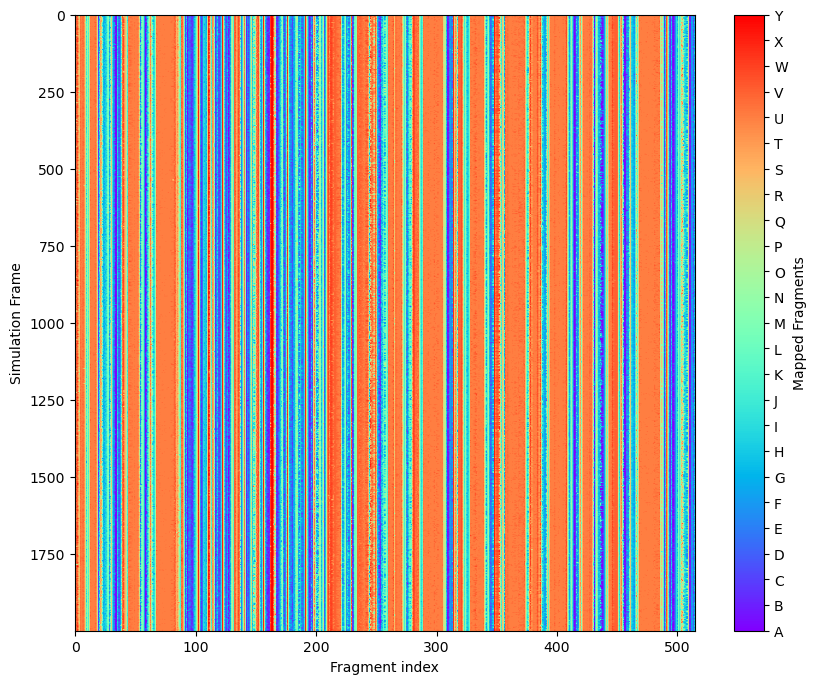

In [4]:
# Plot the randomized trajectory of the Structural Alphabet trajectory of Apo repl1
Allohub_plots.plot_SA_traj(sa_traj_apo1.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

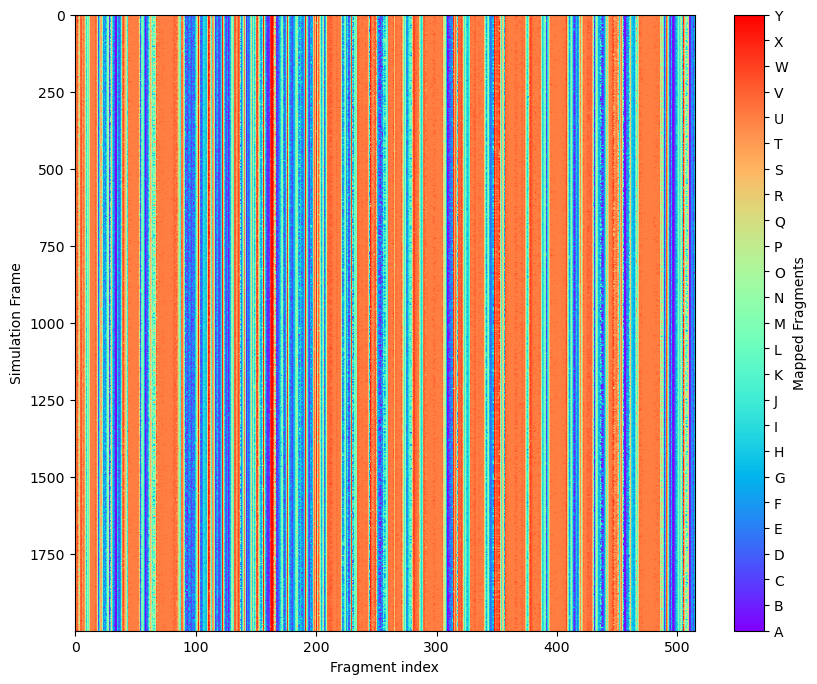

In [5]:
# Plot the randomized trajectory of the Structural Alphabet  trajectory of Fbp repl1
Allohub_plots.plot_SA_traj(sa_traj_fbp1.get_int_traj(), SAtraj.ALPHABETS["M32K25"], action="show")

Shanon entropy of the fragments gives an idea of sturctural flexibility that is complementary to cartesian analysis such as RMSF.
Fragment entropy captures local changes regardless of magnitude of difference since the alphabets is based on internal coordinates.

In [54]:
# Compute the shanon entropy
print("Compute the shanon entropy")

entropy_apo1 = sa_traj_apo1.compute_entropy()
entropy_apo2 = sa_traj_apo2.compute_entropy()
entropy_apo3 = sa_traj_apo3.compute_entropy()

entropy_fbp1 = sa_traj_fbp1.compute_entropy()
entropy_fbp2 = sa_traj_fbp2.compute_entropy()
entropy_fbp3 = sa_traj_fbp3.compute_entropy()

# Save entropy values
save_array_to_txt(entropy_apo1, "fbp1_SA_shanon_entropy.txt")
save_array_to_txt(entropy_apo2, "fbp2_SA_shanon_entropy.txt")
save_array_to_txt(entropy_apo3, "fbp3_SA_shanon_entropy.txt")

save_array_to_txt(entropy_fbp1, "fbp1_SA_shanon_entropy.txt")
save_array_to_txt(entropy_fbp2, "fbp2_SA_shanon_entropy.txt")
save_array_to_txt(entropy_fbp3, "fbp3_SA_shanon_entropy.txt")

Compute the shanon entropy
Array saved successfully to fbp1_SA_shanon_entropy.txt
Array saved successfully to fbp2_SA_shanon_entropy.txt
Array saved successfully to fbp3_SA_shanon_entropy.txt
Array saved successfully to fbp1_SA_shanon_entropy.txt
Array saved successfully to fbp2_SA_shanon_entropy.txt
Array saved successfully to fbp3_SA_shanon_entropy.txt


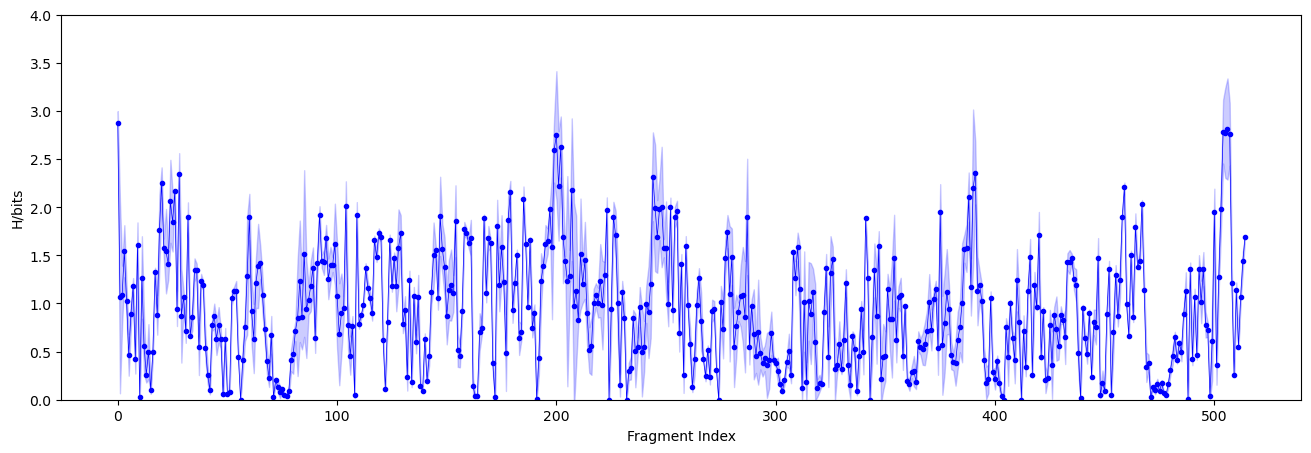

In [55]:
# Plot the entropies of apo with their standard deviations
Allohub_plots.plot_shanon_entropy_sd([entropy_apo1, entropy_apo2, entropy_apo3], action="show", ylim=(0,4))


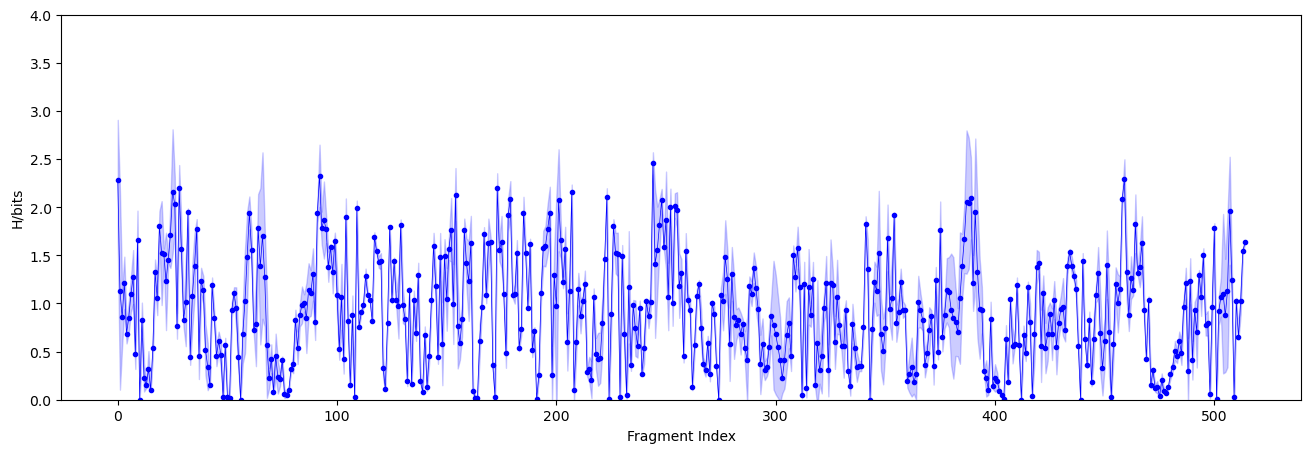

In [56]:
# Plot the entropies of fbp with their standard deviations
Allohub_plots.plot_shanon_entropy_sd([entropy_fbp1, entropy_fbp2, entropy_fbp3], action="show", ylim=(0,4))

Entropy differences can be spotted directly from this graphs. The PKM2 with FBP bound have lower entropy than the apo simulations, which highlights the stabilizing effects that FBP has on the structure and tetramer formation.

The entropies can be averaged and substracted to more easily spot the differences.
Then statistics can be run for each fragment. (to add)

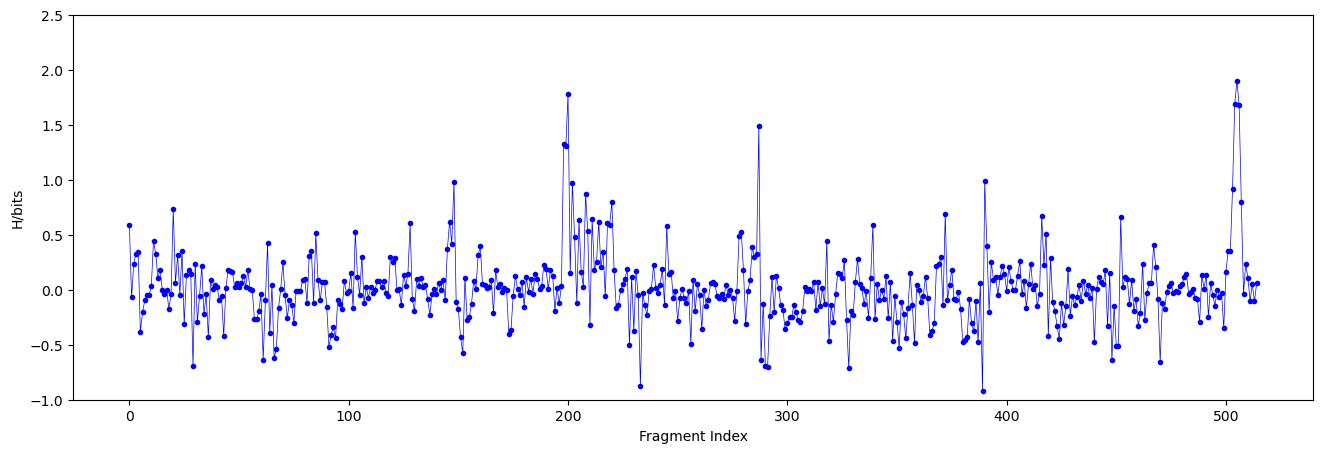

In [57]:
# Compute the mean entropy per condition
mean_apo = np.mean([np.array(entropy_apo1), np.array(entropy_apo2), np.array(entropy_apo3)], axis=0)

mean_fbp = np.mean([np.array(entropy_fbp1), np.array(entropy_fbp2), np.array(entropy_fbp3)], axis=0)

diff = mean_apo - mean_fbp
# Plot the mean entropy
Allohub_plots.plot_shanon_entropy(diff, ylim=(-1,2.5), action="show")

In [ ]:
# Statistical analysis
# first combine the replicates
combined_apo = sa_traj_apo1.combine(sa_traj_apo2)
combined_apo = combined_apo.combine(sa_traj_apo3)

combined_fbp = sa_traj_fbp1.combine(sa_traj_fbp2)
combined_fbp = combined_fbp.combine(sa_traj_fbp3)

boots_entro_apo = combined_apo.compute_entropy(100)
boots_entro_fbp = combined_fbp.compute_entropy(100)

# Loop through each fragment
p_values = []
valid_Fragments = []

for f in range(len(boots_entro_apo[0])):
    apo_f = [x[f] for x in boots_entro_apo] # extract the fragment from each sample
    fbp_f = [x[f] for x in boots_entro_fbp]

    # Perform an independent two-sample t-test
    _, p_value = ttest_ind(apo_f, fbp_f)
    if not np.isnan(p_value):
        p_values.append(p_value)
        valid_Fragments.append(f)

                
# pvalue adjustment
rejected, adj_p_values, _, _ = multipletests(p_values, alpha=0.01, method='fdr_bh')

for i in range(len(rejected)):
    if rejected[i] and abs(diff[valid_Fragments[i]]) > 1:
        print(f"Fragment {valid_Fragments[i]} with entropy difference {diff[valid_Fragments[i]]}")

Fragment 198 with entropy difference 1.3253524584800567
Fragment 199 with entropy difference 1.3069695474473277
Fragment 200 with entropy difference 1.776692203874486
Fragment 287 with entropy difference 1.4904796649971397
Fragment 504 with entropy difference 1.6841929684276586
Fragment 505 with entropy difference 1.8980657910553007
Fragment 506 with entropy difference 1.6784246888996839


The entropy analysis already highlights key regions of the protein.

Positions around fragment 500 (protein 513) are located on the allosteric site for FBP.

Positions around fragment 200 (protein 213) are located at the lid domain that is on top of the active site and positions around 290 are located at the active site.

All of this positions are more stable in presence of FBP (conformationally) than in its abscense, supporting the fact that FBP stabilizes PKM2.


Next step is to compute the mutual information between each fragment pair.
This step is computationally expensive and can last a few hours depending on the number of frames used as well as the size of the system.

In this study we are using 2000 frames corresponding to the last 400 ns of a 500 ns MD trajectory, divided in blocks of 100, which corresponds to 20 ns per block.

In [10]:
print("Calculate the MI information")
# One can specify the number of workers to parallelize the process. max_workers=None would use all available resources.

mi_apo1 = sa_traj_apo1.compute_mis(max_workers=7)
print("Apo 1 finished")
mi_apo2 = sa_traj_apo2.compute_mis(max_workers=7)
print("Apo 2 finished")
mi_apo3 = sa_traj_apo3.compute_mis(max_workers=7)
print("Apo 3 finished")

mi_fbp1 = sa_traj_fbp1.compute_mis(max_workers=7)
print("FBP 1 finished")
mi_fbp2 = sa_traj_fbp2.compute_mis(max_workers=7)
print("FBP 2 finished")
mi_fbp3 = sa_traj_fbp3.compute_mis(max_workers=7)
print("FBP 3 finished")

Calculate the MI information
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [14:58<00:00, 44.91s/block]  


TRAJECTORY COMPLETED
Apo 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [15:04<00:00, 45.22s/block]  


TRAJECTORY COMPLETED
Apo 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [15:20<00:00, 46.05s/block]  


TRAJECTORY COMPLETED
Apo 3 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [16:00<00:00, 48.03s/block]  


TRAJECTORY COMPLETED
FBP 1 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [14:38<00:00, 43.91s/block]  


TRAJECTORY COMPLETED
FBP 2 finished
ENCODING TRAJECTORY


Computing MI: 100%|██████████| 20/20 [15:02<00:00, 45.12s/block]  

TRAJECTORY COMPLETED
FBP 3 finished


One can also visualize the MI matrices as follows:

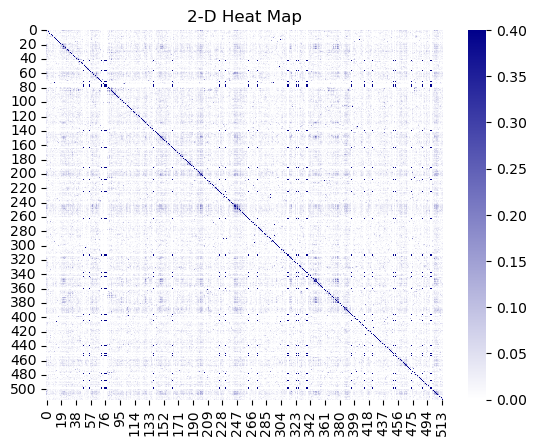

In [11]:
# Plot the MI matrix for the first Block of Apo1
Allohub_plots.plot_mi_matrix(mi_apo1[0].get_mi_matrix(), action="show")

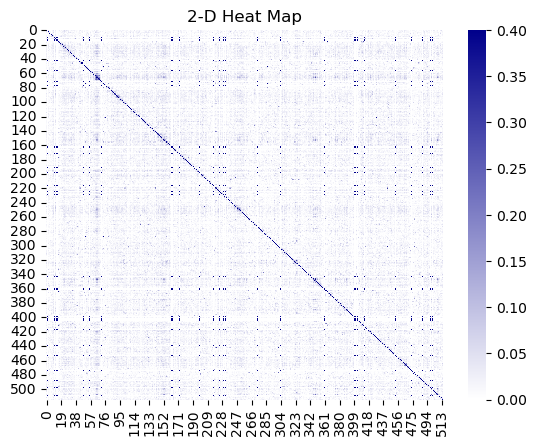

In [12]:
# Plot the MI matrix for the first Block of fbp1
Allohub_plots.plot_mi_matrix(mi_fbp1[0].get_mi_matrix(), action="show")

The eigenvector decomposition of the obtained MI matrices can be used to asses convergence.
The main motions of well converged simulations should have relatively high eigenvector overlap (>0.3).

Overlap between replicates can be used as a way to asses relaiability of the results. (Higher convergences = Higher confidences)

In [13]:
# Do an eigenvector decomposition of the matrices
from tqdm import tqdm

print("Do an eigenvector decomposition of the matrices")

for mi_tr in tqdm(mi_apo1, desc="Eigenvector decomposition for apo 1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_apo2, desc="Eigenvector decomposition for apo 2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_apo3, desc="Eigenvector decomposition for apo 3", unit="matrix"):
    mi_tr.compute_eigensystem()

  
for mi_tr in tqdm(mi_fbp1, desc="Eigenvector decomposition for FBP 1", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_fbp2, desc="Eigenvector decomposition for FBP 2", unit="matrix"):
    mi_tr.compute_eigensystem()
for mi_tr in tqdm(mi_fbp3, desc="Eigenvector decomposition for FBP 3", unit="matrix"):
    mi_tr.compute_eigensystem()  

Do an eigenvector decomposition of the matrices


Eigenvector decomposition for FBP 3: 100%|██████████| 20/20 [00:00<00:00, 54.66matrix/s]


Overlap can be now computed using the Overlap object.
In this analysis we are using the top 3 eigenvectors which should explain most of the observed variability.

In [14]:
# Create the overlap handler to compute similarities between the trajectories
overlap = Overlap.Overlap([mi_apo1, mi_apo2, mi_apo3, mi_fbp1, mi_fbp2, mi_fbp3], ev_list=[0,1,2])
# Compute the eigenoverlap between trajectories
overlap.fill_overlap_matrix()

The results can then be plotted to examine.

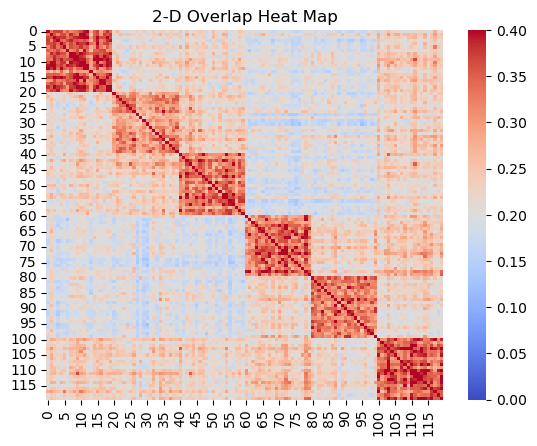

In [ ]:
# plot the overlap matrix
Allohub_plots.plot_overlap(overlap.get_overlap_matrix(), vmax=0.4, action="show")

The replicates corresponding to apo simulations have a higher overlap between them than within conditions, indicating that the simulations were converged enough for further analysis. The higher the overlap the higher the confidence on the obtained results.

One can use the "compute_similarities" function to get a numerical value for the sum of the overlap of matrices belonging to the same simulation vs other simulations. This can be used to test if the similarity within conditions is higher than the similarity between conditions, which would indicate that there is enough signal to do further analysis.

In [16]:
# Compute similarities between overlap matrices
similarity_matrix = overlap.compute_similarities()

SIMILARITIES BETWEEN TRAJECTORY 0  and 1
	Overlap between trajectories: 0.2179
	Overlap of trajectory 1 with itself: 0.3902
	Overlap of trajectory 2 with itself: 0.3372
 Similary 0.8542
SIMILARITIES BETWEEN TRAJECTORY 0  and 2
	Overlap between trajectories: 0.2242
	Overlap of trajectory 1 with itself: 0.3902
	Overlap of trajectory 2 with itself: 0.3635
 Similary 0.8474
SIMILARITIES BETWEEN TRAJECTORY 0  and 3
	Overlap between trajectories: 0.1982
	Overlap of trajectory 1 with itself: 0.3902
	Overlap of trajectory 2 with itself: 0.3667
 Similary 0.8197
SIMILARITIES BETWEEN TRAJECTORY 0  and 4
	Overlap between trajectories: 0.1982
	Overlap of trajectory 1 with itself: 0.3902
	Overlap of trajectory 2 with itself: 0.3581
 Similary 0.824
SIMILARITIES BETWEEN TRAJECTORY 0  and 5
	Overlap between trajectories: 0.2404
	Overlap of trajectory 1 with itself: 0.3902
	Overlap of trajectory 2 with itself: 0.3843
 Similary 0.8531
SIMILARITIES BETWEEN TRAJECTORY 1  and 2
	Overlap between trajectories:

The overlap between and within trajectories can be grouped together to create representations such as a box plot and to compute statistics.

In [17]:
# Statistic significance of convergence
# The groups are simulation 0,1,2 apo 3,4,5 fbp
# The similarity_matrix contains the overlap between the indexed trajectories.
within_conditions = [similarity_matrix[0][1], similarity_matrix[0][2], similarity_matrix[1][2], 
                     similarity_matrix[3][4], similarity_matrix[3][5], similarity_matrix[4][5]]

between_conditions = [similarity_matrix[0][3], similarity_matrix[0][4], similarity_matrix[0][5], 
                      similarity_matrix[1][3], similarity_matrix[1][4], similarity_matrix[1][5],
                      similarity_matrix[2][3], similarity_matrix[2][4], similarity_matrix[2][5]]

tat, p_value = ttest_ind(within_conditions, between_conditions, equal_var=False, alternative='greater')

print(f"p-value of convergence within vs between conditions is {p_value}")

p-value of convergence within vs between conditions is 0.008934513214684341


The obtained p-value indicates that the convergence within replicates is signicantly different than the convergence between conditions, meaning that the analysis captured unique signal for this system.

The next step is to find up and down regulated fragments.
For that, one needs the mapping of trajectories, that is to which condition each simulation belongs. 

In this case we have two conditions, apo (0) and FBP (1).

The argument splitting controls wether the statistics should be compute using the mean mi matrices per replicate (splitting = False) or using all the mi matrices (splitting = True).

Using all mi matrices will show more coupled fragments but will produce a higher degree of false positives.

For this analysis we will use all mi matrices.

In [18]:
# Find upregulated and downregulated fragments
print("Find upregulated and downregulated fragments")

# The fold change of non correlated points would produce a division by zero runtime warning this warnings can be silenced as following:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

updown_regulated_fragments = overlap.updown_regulation(traj_mapping=[0,0,0,1,1,1],splitting=True)

# The obtained dictionary has as keys the pairs of conditions. In this case (0,1).
# If more conditions were used one would have all the additional pairing (0,1), (0,2), (1,2) ....
t12_updown = updown_regulated_fragments[(0,1)]

Find upregulated and downregulated fragments
       FragmentPairs  log2FoldChange   PValues  AdjustedPValues
0             (0, 1)       -1.328402  0.000067         0.000882
1             (0, 2)       -0.618986  0.015432         0.066925
2             (0, 3)       -0.039873  0.784634         0.882312
3             (0, 4)        0.418680  0.014754         0.064691
4             (0, 5)        0.650999  0.000331         0.003270
...              ...             ...       ...              ...
132350    (511, 513)        0.041545  0.846913         0.919358
132351    (511, 514)        0.083875  0.644972         0.792302
132352    (512, 513)       -0.330935  0.019822         0.080529
132353    (512, 514)        0.097508  0.604273         0.763523
132354    (513, 514)        0.238822  0.030721         0.110511

[129509 rows x 4 columns]


Now we can filter the up and down regulated fragments based on a p value and fold change

In [19]:
# Filtering parameters
pval_threshold = 0.01
fold_change_threshold = 5

# First extract significant fragments
significant_fragments = t12_updown[t12_updown['AdjustedPValues'] < pval_threshold]

# Second, filter by fold change and print top 25
up_reg = significant_fragments[significant_fragments['log2FoldChange'] > fold_change_threshold].sort_values('log2FoldChange', ascending=False)
up_reg.head(25)

FragmentPairs  log2FoldChange       PValues  AdjustedPValues
118584    (348, 439)       13.659018  6.844439e-10     4.051488e-08
129515    (439, 450)       13.368893  4.107969e-06     8.458964e-05
114888    (327, 439)       12.819164  1.479589e-06     3.513946e-05
114853    (327, 404)       12.369125  7.505359e-07     1.953595e-05
99639     (258, 439)       12.228348  4.474226e-05     6.284692e-04
108626    (296, 439)       12.066805  3.994785e-04     3.819981e-03
80164     (191, 327)       11.945388  9.379444e-06     1.701831e-04
36138      (75, 439)       11.943711  1.976558e-04     2.141847e-03
90262     (224, 327)       11.942303  7.516608e-07     1.955748e-05
35923      (75, 224)       11.910211  4.526305e-05     6.332776e-04
118549    (348, 404)       11.752727  5.156416e-12     5.014787e-10
90385     (224, 450)       11.680298  3.066572e-07     8.956983e-06
80133     (191, 296)       11.678734  7.746671e-04     6.532699e-03
90434     (224, 499)       11.554574  4.531702e-05     6.338975e-04
99604     (258, 404)       11.529114  4.173977e-06     8.573369e-05
108591    (296, 404)       11.487873  4.086952e-04     3.891691e-03
90193     (224, 258)       11.450006  4.175592e-06     8.575345e-05
126268    (404, 423)       11.353153  8.218394e-04     6.850496e-03
80095     (191, 258)       11.352656  4.513266e-05     6.319140e-04
36103      (75, 404)       11.271815  4.537060e-05     6.344442e-04
90231     (224, 296)       11.190361  4.091099e-04     3.893929e-03
126295    (404, 450)       11.181901  3.076029e-07     8.981089e-06
35890      (75, 191)       11.115600  1.993803e-04     2.156263e-03
90358     (224, 423)       11.090209  8.225646e-04     6.853358e-03
80287     (191, 450)       10.926473  4.176370e-06     8.575602e-05

In [20]:
# Show top 25 Down-regulated fragments
down_reg = significant_fragments[significant_fragments['log2FoldChange'] < -fold_change_threshold].sort_values('log2FoldChange')
down_reg.head(25)


FragmentPairs  log2FoldChange       PValues  AdjustedPValues
127190    (412, 501)      -15.946387  4.335153e-62     1.422244e-57
127198    (412, 509)      -14.772721  3.135235e-25     6.236837e-22
924         (1, 412)      -14.435425  3.047211e-07     8.910344e-06
92728     (232, 509)      -13.699654  2.149008e-10     1.448396e-08
92720     (232, 501)      -13.445380  1.481135e-14     2.538657e-12
125697    (399, 412)      -13.372681  4.514045e-05     6.319140e-04
92498     (232, 279)      -13.077806  2.370147e-05     3.705863e-04
125924    (401, 412)      -12.411475  8.199593e-04     6.838220e-03
80338     (191, 501)      -12.361870  8.854730e-50     1.291728e-45
80346     (191, 509)      -12.300587  1.118932e-22     1.277450e-19
82302     (198, 232)      -12.097141  4.429946e-05     6.232969e-04
82482     (198, 412)      -11.851805  2.197480e-10     1.474254e-08
132016    (488, 501)      -11.834092  2.875243e-07     8.467841e-06
129574    (439, 509)      -11.740194  6.695241e-24     1.034155e-20
127193    (412, 504)      -11.543931  7.530747e-07     1.958651e-05
132024    (488, 509)      -11.121551  2.043487e-05     3.267489e-04
92506     (232, 287)      -10.931713  1.668772e-04     1.861640e-03
80236     (191, 399)      -10.720732  4.536421e-05     6.344225e-04
74030     (172, 501)      -10.719825  1.850905e-20     1.252624e-17
104757    (279, 412)      -10.543124  4.557074e-05     6.370394e-04
74038     (172, 509)      -10.342009  7.242151e-14     1.061201e-11
70916     (163, 501)      -10.181503  8.876531e-32     8.324411e-28
129566    (439, 501)      -10.124144  4.565860e-55     9.991015e-51
80035     (191, 198)      -10.078662  7.098854e-10     4.183226e-08
70924     (163, 509)      -10.066538  1.247332e-17     4.309598e-15

In [50]:
# Most frequent fragments
top_fragments_count = {}

for fragment_pair in up_reg["FragmentPairs"]:
    top_fragments_count.setdefault(fragment_pair[0], 0) # record first fragment of the pair
    top_fragments_count.setdefault(fragment_pair[1], 0) # record second fragment of the pair
    top_fragments_count[fragment_pair[0]] += 1
    top_fragments_count[fragment_pair[1]] += 1

for fragment_pair in down_reg["FragmentPairs"]:
    top_fragments_count.setdefault(fragment_pair[0], 0) # record first fragment of the pair
    top_fragments_count.setdefault(fragment_pair[1], 0) # record second fragment of the pair
    top_fragments_count[fragment_pair[0]] += 1
    top_fragments_count[fragment_pair[1]] += 1

# sort based on counts
top_fragments_count = dict(sorted(top_fragments_count.items(), key=lambda item: item[1], reverse=True))

# Print top 30 most appearing fragments
dict_keys = list(top_fragments_count.keys())
for i in range(25):
    frag = dict_keys[i]
    print(f"Fragment {frag} appears {top_fragments_count[frag]} times.")


Fragment 501 appears 272 times.
Fragment 232 appears 175 times.
Fragment 488 appears 74 times.
Fragment 509 appears 34 times.
Fragment 348 appears 27 times.
Fragment 450 appears 21 times.
Fragment 258 appears 21 times.
Fragment 198 appears 19 times.
Fragment 327 appears 17 times.
Fragment 499 appears 17 times.
Fragment 439 appears 16 times.
Fragment 191 appears 16 times.
Fragment 1 appears 16 times.
Fragment 164 appears 15 times.
Fragment 287 appears 15 times.
Fragment 417 appears 15 times.
Fragment 163 appears 14 times.
Fragment 504 appears 14 times.
Fragment 108 appears 13 times.
Fragment 172 appears 13 times.
Fragment 75 appears 12 times.
Fragment 498 appears 12 times.
Fragment 453 appears 11 times.
Fragment 312 appears 11 times.
Fragment 48 appears 11 times.


One can also create a volcano plot for the data

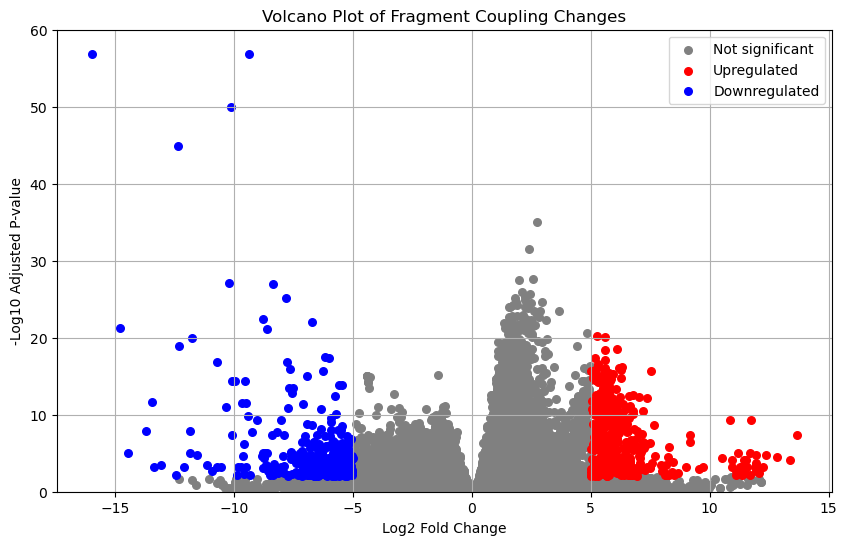

In [ ]:
# Plot volcano plot of Up and Down regulated fragments
Allohub_plots.plot_updownregulation(t12_updown,  fold_threshold=fold_change_threshold, ylim=60, pvalue_threshold=pval_threshold, action="show")

Mapping the fragments back to the protein reveals the following:

Fragment 499, 501, 504 and 509 are located on the bidning site of the allosteric modulator (FBP). These fragments consistently appears on the top hits. (Color Green)

Fragments 232, 258, 198, 191, 164, 287, 163 and 108  are located on the active site and active lid of the protein. (Colored Red)

Fragment 488 and 439 are located on the second allosteric site, where aminoacids such as Phe ans Ser bind to modulate the funciton of PKM2. (Colored Purple)

Fragments 348, 417 are between the active site and FBP allosteric site, directly interacting with them the active site, interacting with residues involved in the active site cavity. (Colored Orange)

Fragments 327 is located at a direct interface between the monomers. (Colored Yellow)

Figure to be added

Finally, one can create a graph representation using the mutual information signal as weights.

For that a distance matrix between C alpha carbons is necessary (in Angstroms).

One can calculate such matrix with mdtraj.
The size of the encoded fragments is also necessary, 4 in the case of M32k25 and 1 in the case of the 3DI alphabet

In [23]:
# Compute distances between c alphas from a pdb
import mdtraj as md

# Load trajectory
traj = md.load("data/pkm2_monomer.pdb")

# Select only the C-alpha atoms
ca_indices = traj.topology.select('name CA')


# Extract the coordinates of C-alpha atoms
ca_positions = traj.xyz[0][ca_indices]

# Compute the pairwise distance matrix
distance_matrix = np.linalg.norm(ca_positions[:, np.newaxis, :] - ca_positions[np.newaxis, :, :], axis=-1)

# Convert to angstroms
distance_matrix *= 10

In [39]:
# Create the Structural alphabet network
# Create graph representations for all states based on the defined mapping
# traj_list should be a list of trajectories. Here we are using the combined Mi matrices for all simulations
# Distance limit is the maximum distance (in Angstroms) between the c alpha of each member to be considered in contact. 
# 7 is the recommended value for the M32k25 alphabet

# We are interested in the signal transmition of FBP so we will create the graph for the FBP conditions only
SAgraph_fbp = SANetwork.SANetWork(traj_list= mi_fbp1 +  mi_fbp2 + mi_fbp3, distance_limit=7)

# Load the distances. The fragment size for M32k25 is 4.
SAgraph_fbp.set_distance_matrix(matrix=distance_matrix, fragment_size=4)

# The pval_threshold filters coupled pairs with low significance
SAgraph_fbp.create_graph(pval_threshold=0.05)

# Compute eigenvector centrality to find rellevant nodes
centrality_fbp_df = SAgraph_fbp.compute_centrality()

# Sort values and print top 5
centrality_fbp_df.sort_values("Centrality", ascending=False).head(5)


fragments  Centrality
404        404    0.289108
191        191    0.286814
224        224    0.286410
439        439    0.285673
501        501    0.237950

Fragments with high eigenvector centrality represent localized focuses of correlation in the system.

From the top 5 fragments, 439 is located in the second allosteric site where modulator aminoacids bind, 404 is located in the interface between monomers, 191 is located in the lid and interacts with the active site and 501 is located in the FBP binding site.

Fragment 224 in the other hand is located midway in the protein, highlighting an interesting position to further examinate. nterestingly, a mutation 4 aminoacids away of this position has been reported to decrease FBP activation without drastically changing tetramer formation.

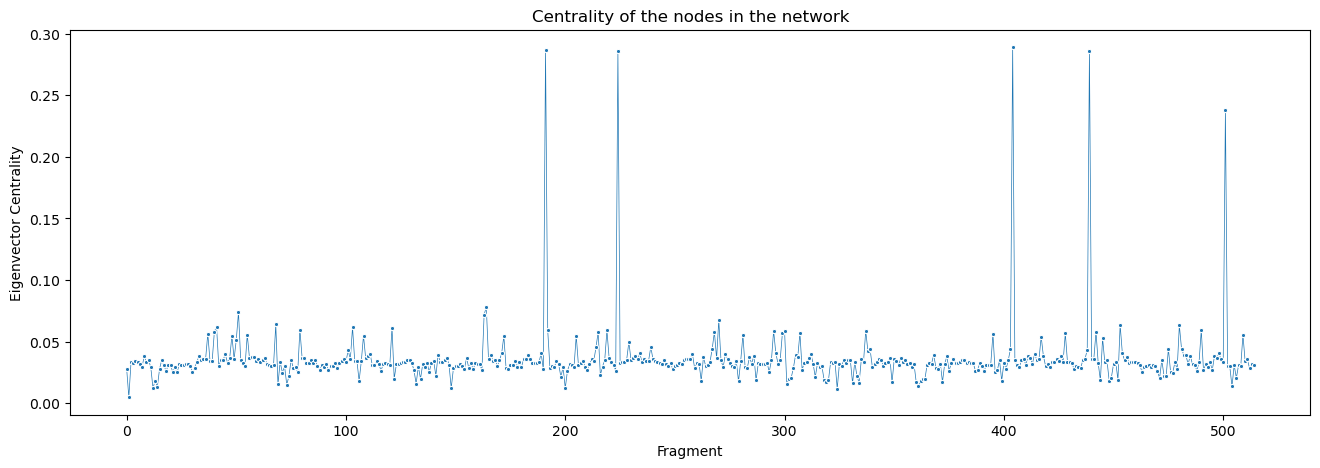

In [40]:
# Plot the Centrality values
Allohub_plots.plot_network_centrality(centrality_fbp_df, action="show")

The more connected nodes are 404, 191, 224, 439 and 501 which may be relevant for signal transmition inside the protein.
One can extract the graph using SAgraph_fbp.get_graph()
This will return a default networkx object with all nodes and edges. This can then be used on other applications that work with graphs. 

One can also create a subgraph containing only the shortest path between residues of interest.
For this study we will search for conections from fragments 420, 476, 501 (located in the FBP bidning site) to the active site residues 106, 260, 281, 283, 284, 316

In [ ]:
fbp_site_fragments = [420, 476, 501 ] 
active_site_fragments = [106, 260, 281, 283, 284, 316]

# Subgraph is a networkx object with the nodes and edges of the shortest paths connecting those residues
# Shortest_pathd ans shortest_distances are list of the shortest paths and their distances respectively.
# z_score provides an estimate of how statistically coupled the two sites are
subgraph, shortest_paths, shortest_distances, z_score = SAgraph_fbp.identify_preferential_connections(start_fragments=fbp_site_fragments,
                                                                                                       end_fragments=active_site_fragments)

The graphs can also be plotted. The Edges will be proportional to the weights of the connections, the starting fragments will be highlighted in Blue,
the ending residues in red and the intermidiate residues in green.

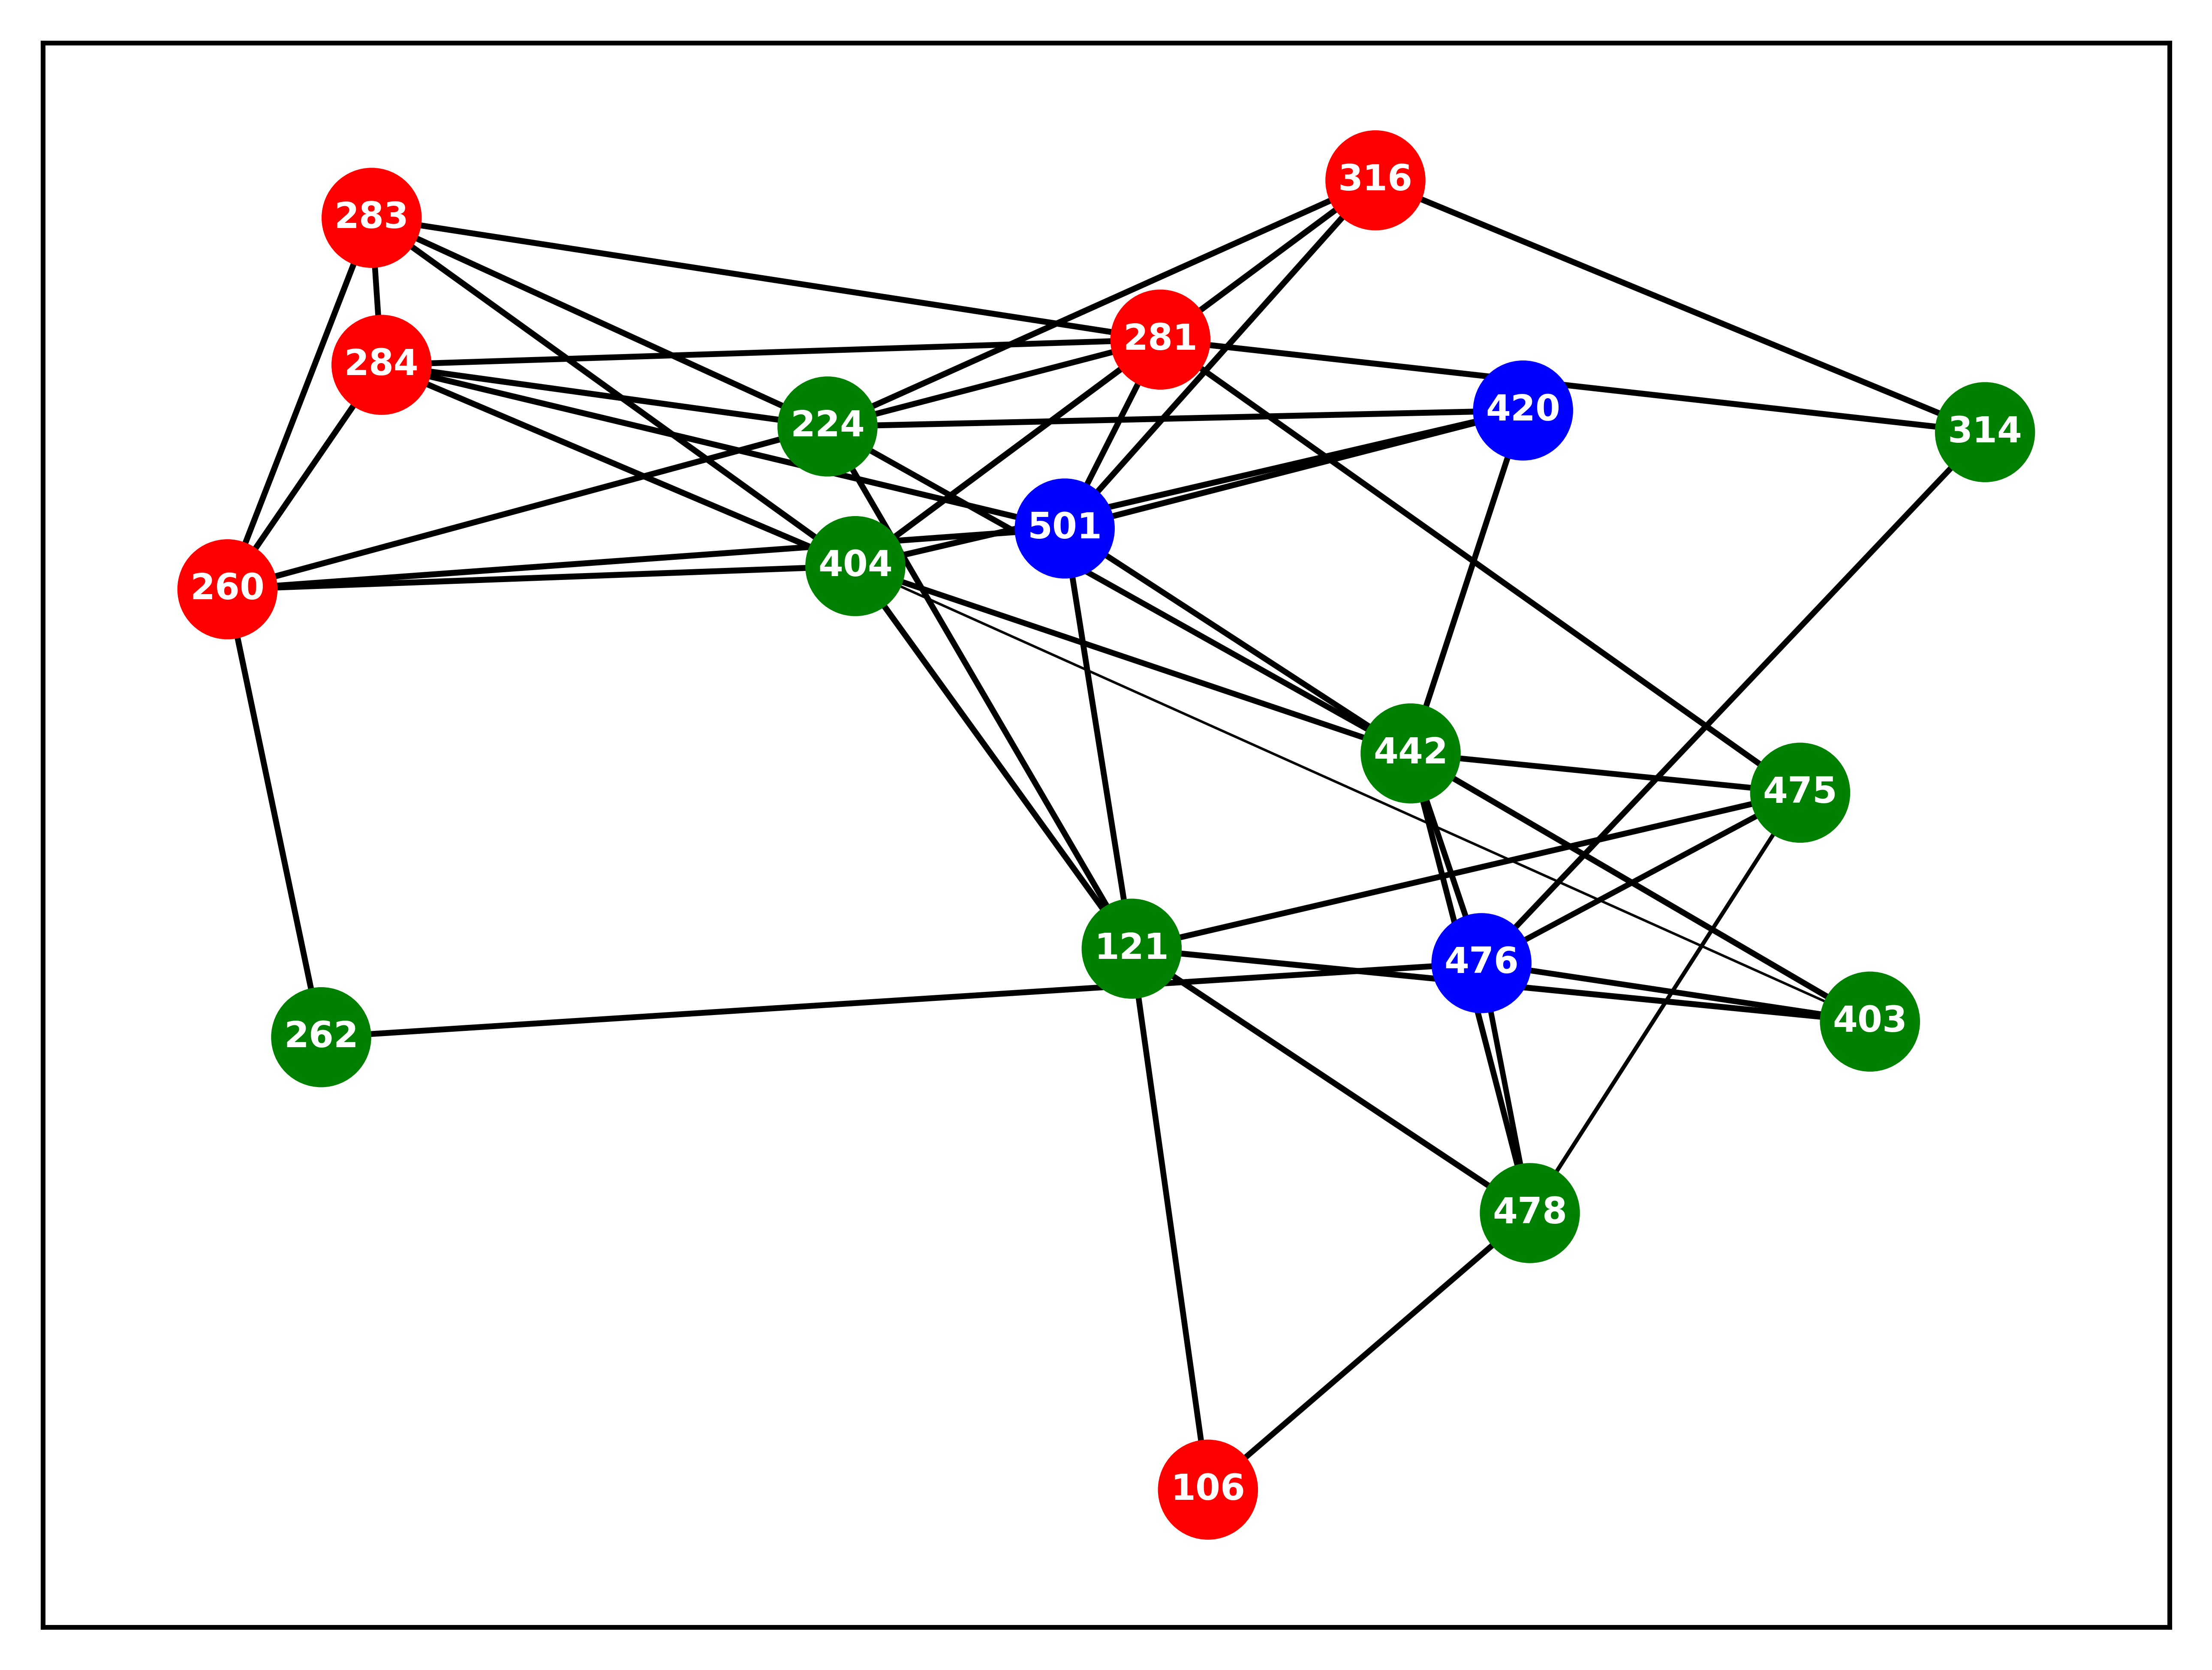

In [44]:
# Create representation of the graph
Allohub_plots.plot_SA_graph(subgraph, fbp_site_fragments, active_site_fragments, action="show")

The obtained subgraph can be used to find signaling path of interest. For example, the previous subgraph detected a conection between fragment 476 and 314. Two fragments that map to residues that were previoulsy reported to affect the allosteric modulation of PKM2 when mutated (A327 and R489).

To find which residues may have the highest weight given the fragment one can use a Protein Language Model to extract the likelihood of the residues.
Residues with a higher likelihood are more likely to be important for the protein.

In this case we will extract the likelihoods for the residues of fragments 314, 476 and 501.

In [ ]:
# The sequence should match the one used in the simulations
traj = md.load("data/pkm2_monomer.pdb")

# Create a subset trajectory containing only the protein
protein_traj = traj.atom_slice(traj.topology.select("protein"))

pkm2_sequence = ''.join([str(residue.code) for residue in protein_traj.topology.residues])


# Create the PLM handler. The fragment size for alphabet M32k25 is 4
esm_handler = SAPLM.SAPLM(fragment_size = 4)
esm_handler.set_sequence(pkm2_sequence)

# Extract likelihoods for fragment 314, 476, 501
likelihood_314_df = esm_handler.fragment_likelihoods(fragment=314, offset=12)
print(likelihood_314_df)

likelihood_476_df = esm_handler.fragment_likelihoods(fragment=476, offset=12)
print(likelihood_476_df)

likelihood_501_df = esm_handler.fragment_likelihoods(fragment=501, offset=12)
print(likelihood_501_df)


   Amino acid position Amino acid  Likelihood
0                  327          A    0.999551
1                  328          T    0.999776
2                  329          Q    0.998122
3                  330          M    0.999274
   Amino acid position Amino acid  Likelihood
0                  489          R    0.997181
1                  490          V    0.878925
2                  491          N    0.777121
3                  492          F    0.854493
   Amino acid position Amino acid  Likelihood
0                  514          G    0.996904
1                  515          W    0.969696
2                  516          R    0.916875
3                  517          P    0.753172


For fragment 314 all surrounding aminoacids appear to be equally important. For the case of fragment 476, the most predominant residue seems to be R489, correctly matching the residue that was reported to be key for the activation of PKM2 by FBP, which when mutated to Leucine produce an inhibition of the effects of FBP and whose inhibitori effect is compensated when Phe is present in the second allosteric pocket.
Finally, fragment 501 seems to point to residue G514 as the most important.